# Car Mileage Prediction with Linear Regression

This notebook analyzes car mileage data and builds a linear regression model to predict car mileage using the Cardekho dataset.

## 1. Import Required Libraries
Import pandas, numpy, matplotlib, seaborn, and scikit-learn libraries.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load and Explore the Car Mileage Dataset
Load the car mileage dataset, display the first few rows, and summarize the data.

In [2]:
# Load the car mileage dataset
df = pd.read_csv('cardekho_dataset.csv')

# Display the first 5 rows
display(df.head())

# Show dataset info
df.info()

# Show summary statistics
display(df.describe())

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


## 3. Preprocess the Data
Handle missing values, encode categorical variables if necessary, and select relevant features for prediction.

In [3]:
# Preprocessing
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

# Fill missing values if any (example: fill with median for numerics)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Select features (drop car_name, selling_price, and mileage from features)
X = df.drop(['car_name', 'selling_price', 'mileage'], axis=1)
y = df['mileage']

Missing values per column:
Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_632\3357660439.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_632\3357660439.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

## 4. Visualize Data Relationships
Create plots to explore relationships between features and car mileage.

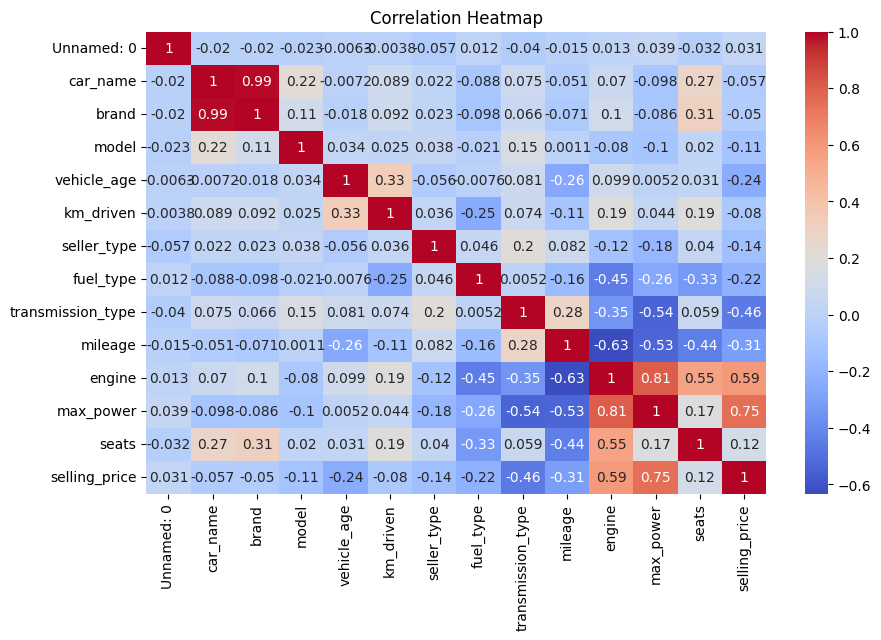

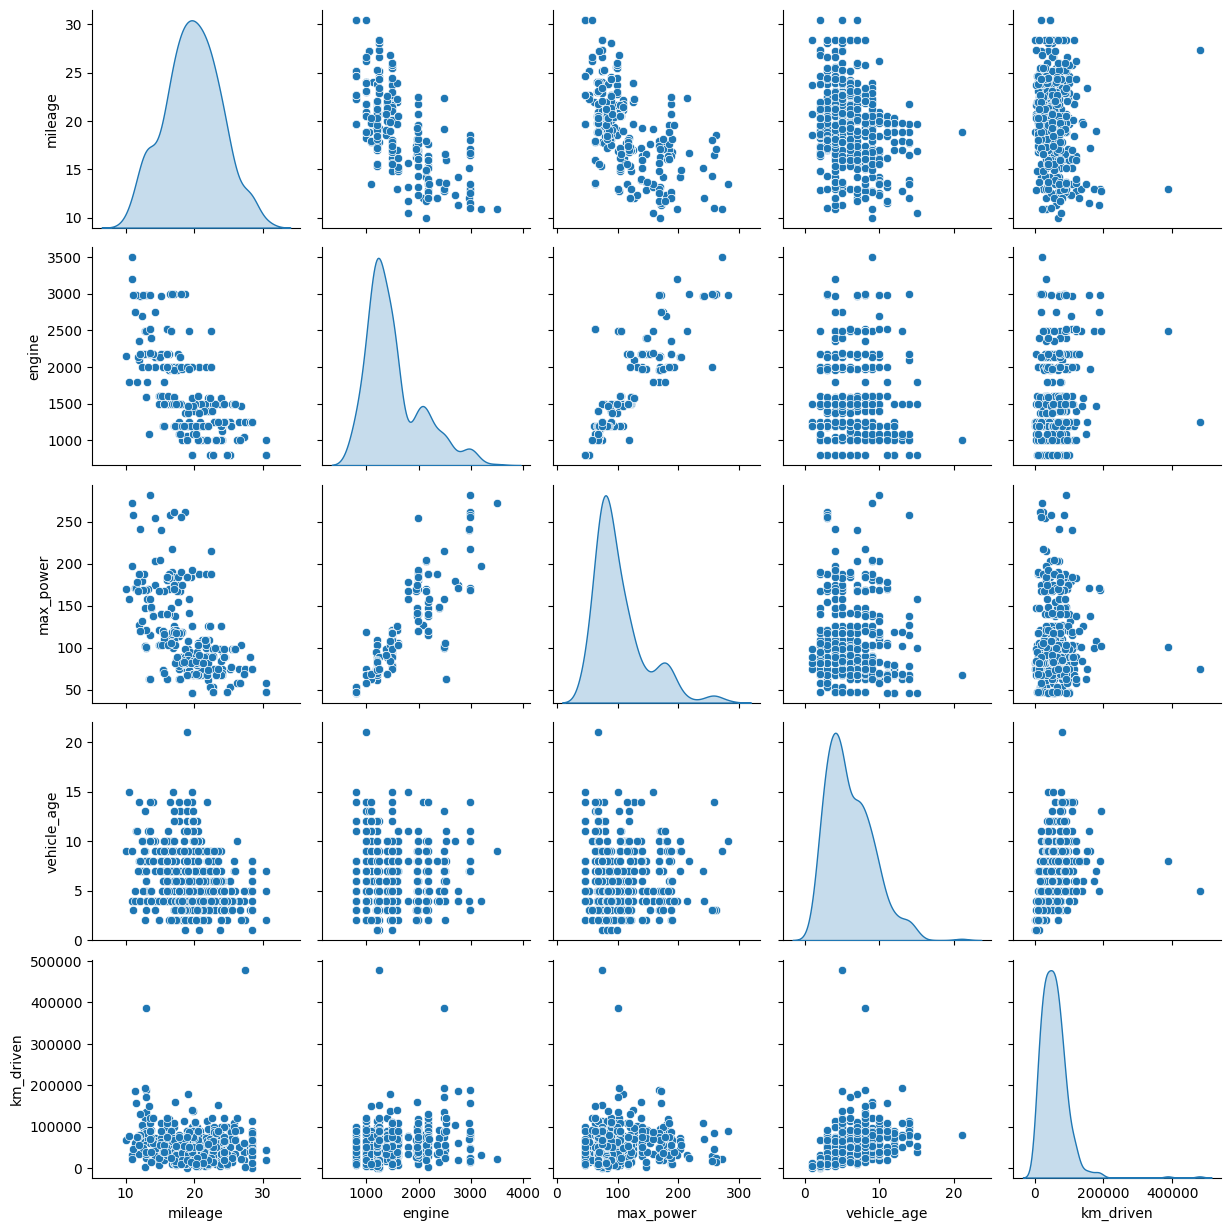

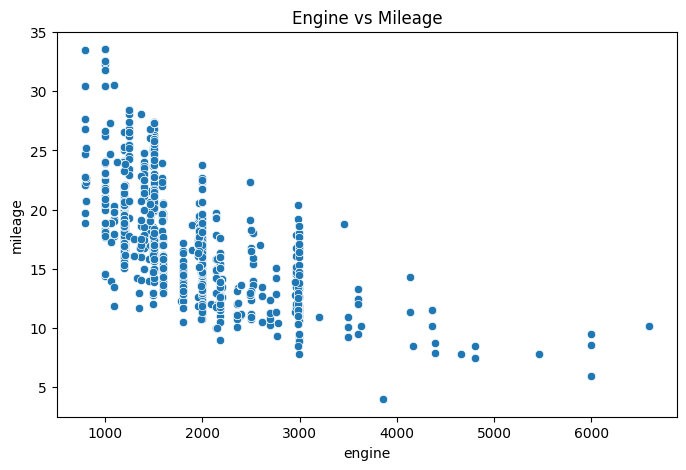

In [4]:
# Visualize relationships
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
sns.pairplot(df[['mileage', 'engine', 'max_power', 'vehicle_age', 'km_driven']].sample(500), diag_kind='kde')
plt.show()

# Scatter plot: engine vs mileage
plt.figure(figsize=(8,5))
sns.scatterplot(x='engine', y='mileage', data=df)
plt.title('Engine vs Mileage')
plt.show()

## 5. Split Data into Training and Test Sets
Use scikit-learn's train_test_split to divide the data into training and test sets.

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 12328, Test samples: 3083


## 6. Train Linear Regression Model
Fit a linear regression model using the training data.

In [6]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## 7. Evaluate Model Performance
Calculate and display metrics such as Mean Squared Error (MSE), R-squared, and plot predicted vs actual values.

Mean Squared Error: 4.91
R^2 Score: 0.72


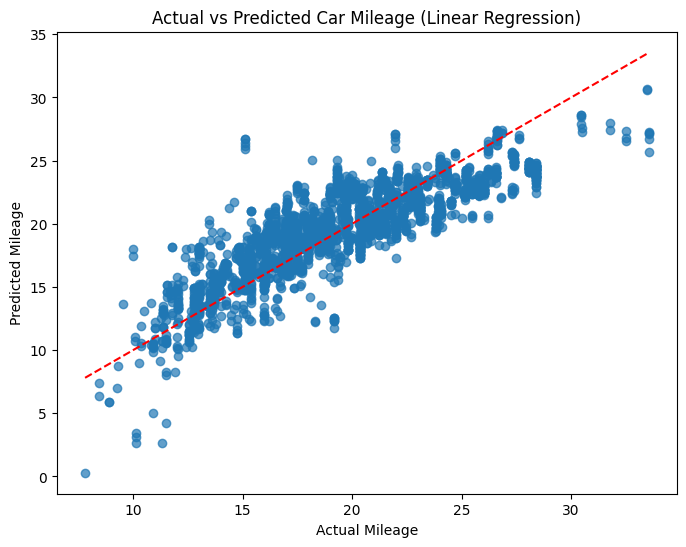

In [7]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plot predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Mileage')
plt.ylabel('Predicted Mileage')
plt.title('Actual vs Predicted Car Mileage (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## 8. Make Predictions with the Model
Use the trained model to predict car mileage for new or test data and display the results.

In [8]:
# Show first 10 actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results.head(10))

,Actual,Predicted
3334,20.36,17.541953
10928,27.39,24.901571
2518,20.77,20.933669
11322,18.40,18.757452
9394,19.70,21.038673
13649,13.93,14.927466
11892,18.90,19.364892
5133,22.50,21.076154
1611,16.80,16.142692
8137,15.06,17.440254
